<a href="https://colab.research.google.com/github/AnishaMalhotra/ML_LABS/blob/main/ML_LAB12_CE014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader

In [4]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
type(X_train), len(X_train), len(X_test), len(y_train)
     

(numpy.ndarray, 60000, 10000, 60000)

In [5]:
#converting data to float format
X_train = X_train.astype(dtype=np.float32)
X_test = X_test.astype(dtype=np.float32)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [7]:
#flatten images of 28*28 to add to network

X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [8]:
#convert input into range of 0-1
#normalize

X_train = X_train / 255.0
X_test = X_test / 255.0
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
#tensors for features and targets

X_train_data = torch.from_numpy(X_train)
X_test_data = torch.from_numpy(X_test)
y_train_data = torch.from_numpy(y_train)
y_test_data = torch.from_numpy(y_test)

X_train_data.shape, y_train_data.shape

(torch.Size([60000, 784]), torch.Size([60000]))

In [10]:
#initializing model parameters

batch_size = 32 #@param {type: "number"}
iterations = 10000 #@param {type: "number"}
epochs = iterations / (len(X_train) / batch_size)
epochs = int(epochs)
epochs

5

In [11]:
#loading in parts using dataloader

dataloader = DataLoader(dataset=X_train_data, batch_size=batch_size, shuffle=False)
outputloader = DataLoader(dataset=y_train_data, batch_size=batch_size, shuffle=False)
testloader = DataLoader(dataset=X_test_data, batch_size=batch_size, shuffle=False)
testoploader = DataLoader(dataset=y_test_data, batch_size=batch_size, shuffle=False)

In [12]:
def image_display(arr):
    arr = arr.cpu().detach().numpy()
    arr = arr.reshape(28, 28)
    plt.imshow(arr)

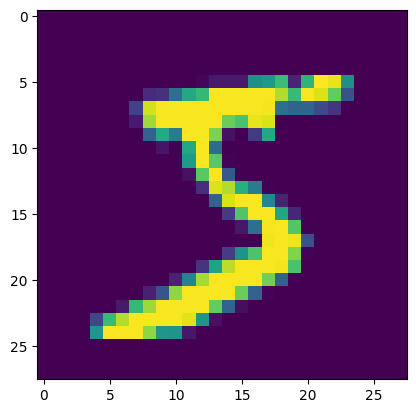

In [13]:
image_display(X_train_data[0])


MODEL - 


In [14]:
#creating the model

class ANNModel(nn.Module):
    def __init__(self, input, hidden, output):
        super(ANNModel, self).__init__()
        self.linear1 = nn.Linear(input, hidden)
        self.linear2 = nn.Linear(hidden, output)
    def forward(self, X):
        X = X.view(-1, 28*28)
        X = torch.sigmoid(self.linear1(X))
        X = self.linear2(X)
        return X

In [15]:
input_dim = (28 * 28)
hidden_dim = (28 * 10)
output_dim = 10

model = ANNModel(input_dim, hidden_dim, output_dim)

model.parameters

<bound method Module.parameters of ANNModel(
  (linear1): Linear(in_features=784, out_features=280, bias=True)
  (linear2): Linear(in_features=280, out_features=10, bias=True)
)>

In [16]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.02 #@param {type: "number"}
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [17]:
#training the model

count = 0
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(epochs):
    for i, j in zip(dataloader, outputloader):
        optimizer.zero_grad()
        train = Variable(i)
        labels = Variable(j)
        predictions = model(train)
        loss = nn.functional.cross_entropy(predictions, labels)
        count += 1
        loss.backward()
        optimizer.step()
        if count % 1000 == 0:
            correct = 0
            total = 0
            with torch.no_grad():
              for ti, tj in zip(dataloader, outputloader):
                test = Variable(ti)
                testop = Variable(tj)
                predictions = model(test)
                _, predicted = torch.max(predictions.data, 1)
                total += testop.size(0)
                correct += (predicted == testop).sum().item()
            accuracy = 100 * correct / total
            accuracy_list.append(accuracy)
            print("Loss ... ", loss)
            print("Accuracy ... \n", accuracy)
            loss_list.append(loss.item())
            iteration_list.append(count)

Loss ...  tensor(1.1964, grad_fn=<NllLossBackward0>)
Accuracy ... 
 76.45166666666667
Loss ...  tensor(0.6439, grad_fn=<NllLossBackward0>)
Accuracy ... 
 84.00833333333334
Loss ...  tensor(0.5797, grad_fn=<NllLossBackward0>)
Accuracy ... 
 86.72666666666667
Loss ...  tensor(0.4841, grad_fn=<NllLossBackward0>)
Accuracy ... 
 88.19666666666667
Loss ...  tensor(0.4537, grad_fn=<NllLossBackward0>)
Accuracy ... 
 89.08166666666666
Loss ...  tensor(0.3563, grad_fn=<NllLossBackward0>)
Accuracy ... 
 89.20833333333333
Loss ...  tensor(0.3792, grad_fn=<NllLossBackward0>)
Accuracy ... 
 89.84333333333333
Loss ...  tensor(0.4435, grad_fn=<NllLossBackward0>)
Accuracy ... 
 90.055
Loss ...  tensor(0.1839, grad_fn=<NllLossBackward0>)
Accuracy ... 
 90.29333333333334


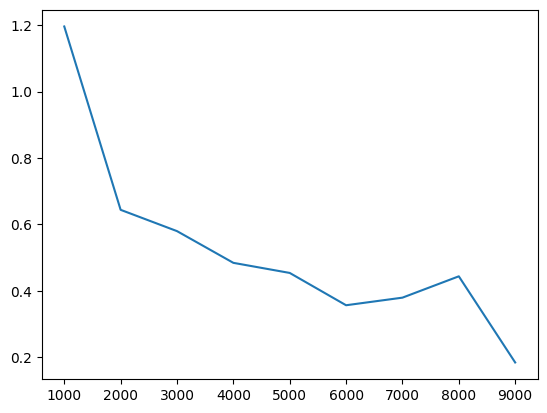

In [18]:
plt.plot(iteration_list, loss_list)
plt.show()